# Inroduction to Matplotlib

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt, pandas as pd, numpy as np

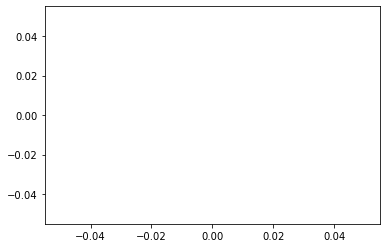

In [3]:
plt.plot(); #same as plt.plot() then plt.show()

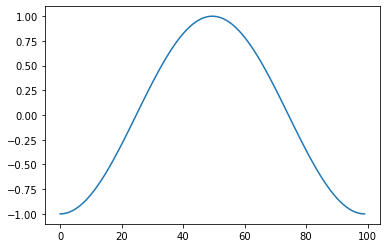

In [4]:
plt.plot(np.cos(np.linspace(-1,1,100)*3.14));

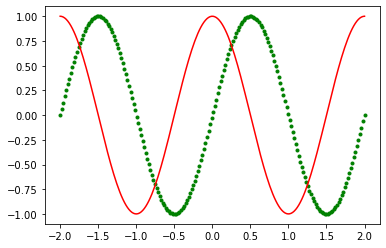

In [5]:
x = np.linspace(-2, 2, 200)

plt.plot(x, np.cos(x*np.pi - np.pi/2), 'g.');
plt.plot(x, np.cos(x*np.pi), 'r-');

[Text(0.5, 1.0, 'Semi-Circle'), Text(0.5, 0, 'x-axis'), Text(0, 0.5, 'y-axis')]

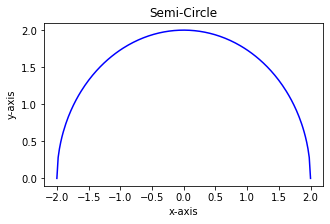

In [6]:
fig, ax = plt.subplots(figsize =(5, 3))
ax.plot(x, np.sqrt(4 - x**2) , 'b-')
ax.set(title = 'Semi-Circle', xlabel = 'x-axis', ylabel = 'y-axis')

In [7]:
fig.savefig(r".\Semi-Circle.png")

##### Scatter plot

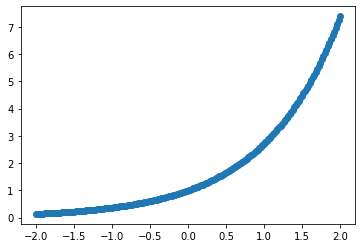

In [8]:
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

##### Bar plot

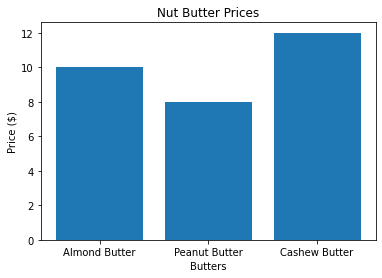

In [9]:
prices = {'Almond Butter': 10,
          'Peanut Butter': 8,
          'Cashew Butter': 12}
fig, ax = plt.subplots()
ax.bar(prices.keys(), prices.values())
ax.set(title = 'Nut Butter Prices', xlabel = 'Butters', ylabel = 'Price ($)');

#####  Histogram

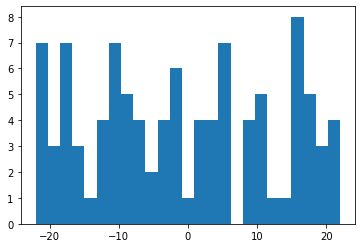

In [10]:
fig, ax = plt.subplots()
ax.hist(np.random.randint(-25, 25, 100), bins = 25);

#####  Plotting from pandas Dataframes

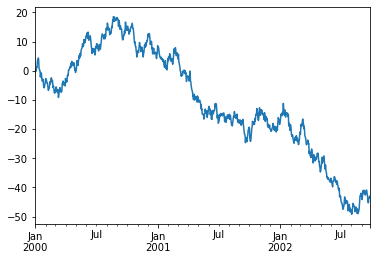

In [12]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2020', periods = 1000))
ts = ts.cumsum()
ts.plot();

In [19]:
sales = pd.read_csv('car-sales-extended.csv')
sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [20]:
sales['Total Sales'] = sales['Price'].cumsum()
sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Total Sales
0,Honda,White,35431,4,15323,15323
1,BMW,Blue,192714,5,19943,35266
2,Honda,White,84714,4,28343,63609
3,Toyota,White,154365,4,13434,77043
4,Nissan,Blue,181577,3,14043,91086


In [22]:
sales['Date'] = pd.date_range('2021/01/01', periods = len(sales))
sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Total Sales,Date
0,Honda,White,35431,4,15323,15323,2021-01-01
1,BMW,Blue,192714,5,19943,35266,2021-01-02
2,Honda,White,84714,4,28343,63609,2021-01-03
3,Toyota,White,154365,4,13434,77043,2021-01-04
4,Nissan,Blue,181577,3,14043,91086,2021-01-05


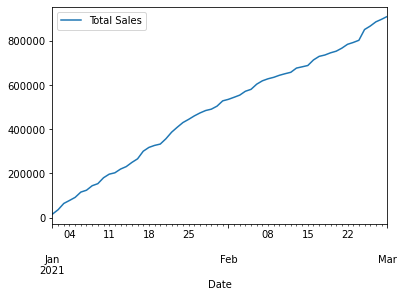

In [26]:
sales.head(60).plot(x = 'Date', y = 'Total Sales');

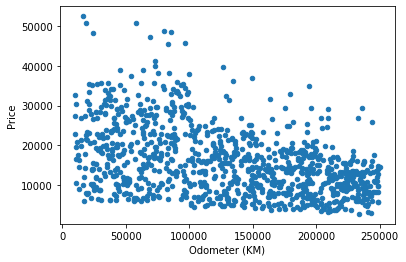

In [30]:
sales.plot(x = 'Odometer (KM)', y = 'Price', kind = 'scatter');

In [34]:
x = np.random.random((10, 4))
df = pd.DataFrame(data = x, columns = 'a b c d'.split())
df

,a,b,c,d
0,0.143180,0.425406,0.454593,0.352516
1,0.997027,0.101645,0.404710,0.148661
2,0.440354,0.062919,0.794494,0.053793
3,0.499907,0.444114,0.046794,0.672764
4,0.054218,0.318124,0.037129,0.137277
5,0.824491,0.506569,0.652604,0.015839
6,0.121877,0.337539,0.291415,0.764995
7,0.572226,0.721769,0.505420,0.803121
8,0.903860,0.116762,0.956029,0.780720
9,0.199658,0.047865,0.439281,0.338999


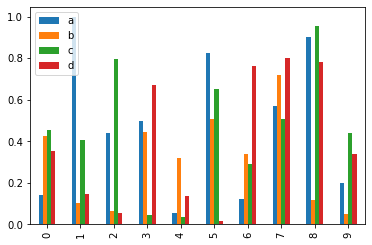

In [35]:
df.plot.bar(); # or df.plot(kind = 'bar');

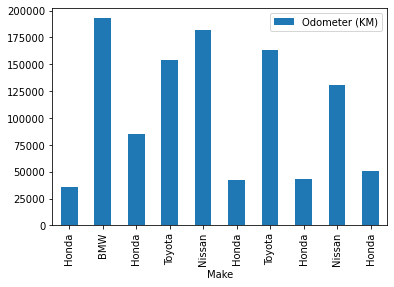

In [53]:
sales.head(10).plot(y = 'Odometer (KM)', x = 'Make', kind = 'bar');

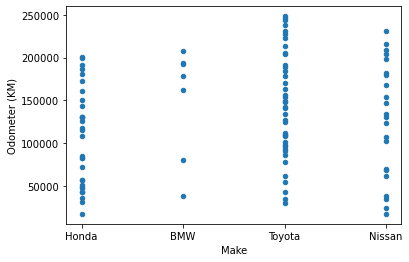

In [69]:
sales.head(100).plot(y = 'Odometer (KM)', x = 'Make', kind = 'scatter');

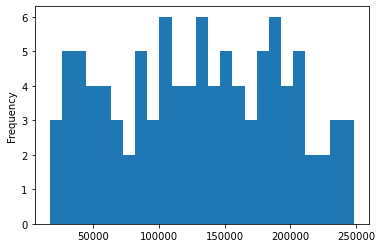

In [73]:
sales.head(100)['Odometer (KM)'].plot.hist(bins = 25); # same as sales.head(100)['Odometer (KM)'].plot(kind = 'hist')

In [79]:
todo = [15802, 59639]

In [83]:
patients = pd.read_csv('heart-disease.csv')
patients.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


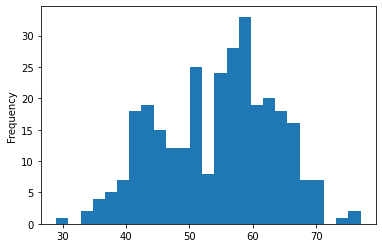

In [85]:
patients['age'].plot(kind = 'hist', bins = 25);

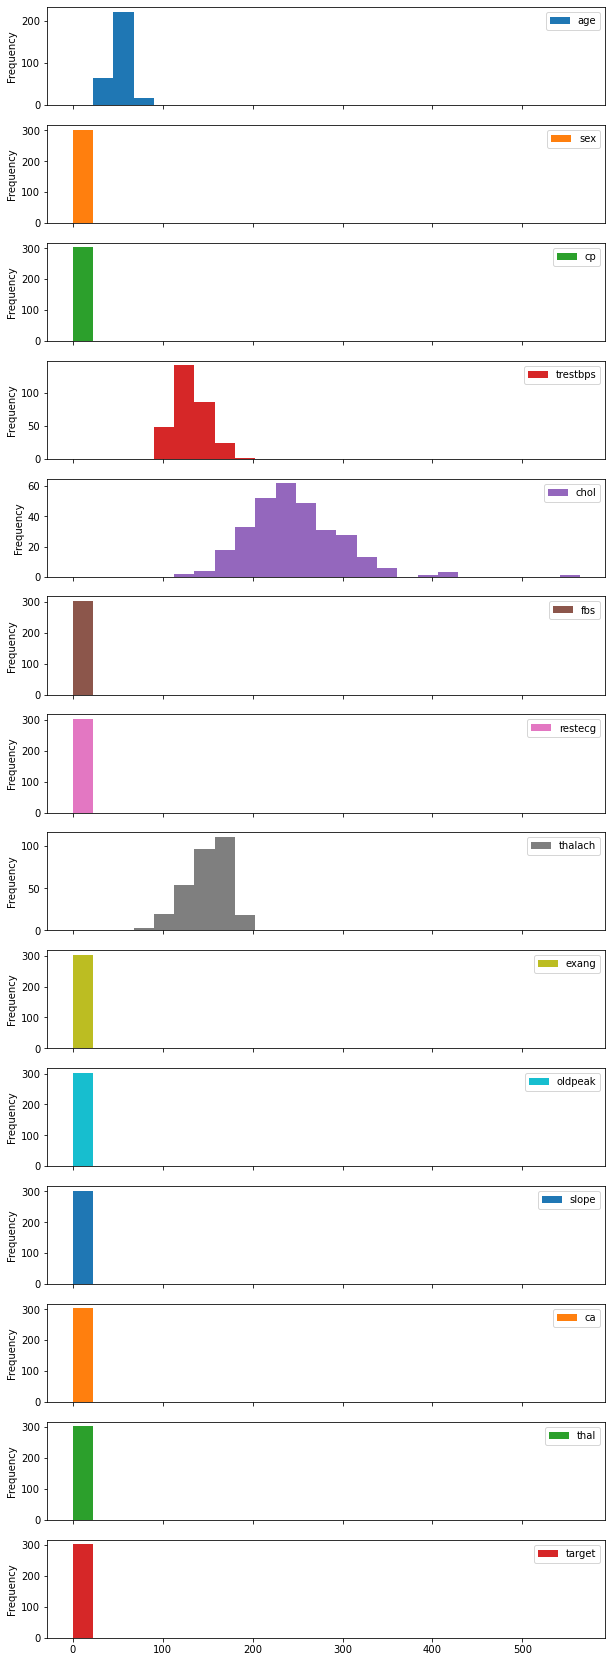

In [91]:
patients.plot(kind = 'hist', subplots = True, figsize = (10, 30), bins = 25);

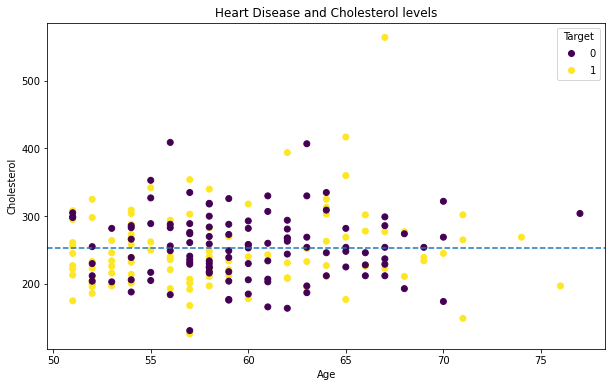

In [97]:
patients50 = patients[patients['age'] > 50]
fig ,ax = plt.subplots(figsize = (10, 6))

scatter = ax.scatter(x = patients50['age'], y = patients50['chol'], c = patients50['target'])

ax.set(title = 'Heart Disease and Cholesterol levels', xlabel = 'Age', ylabel = 'Cholesterol')

ax.legend(*scatter.legend_elements(), title = 'Target')

ax.axhline(patients50['chol'].mean(), ls = '--');

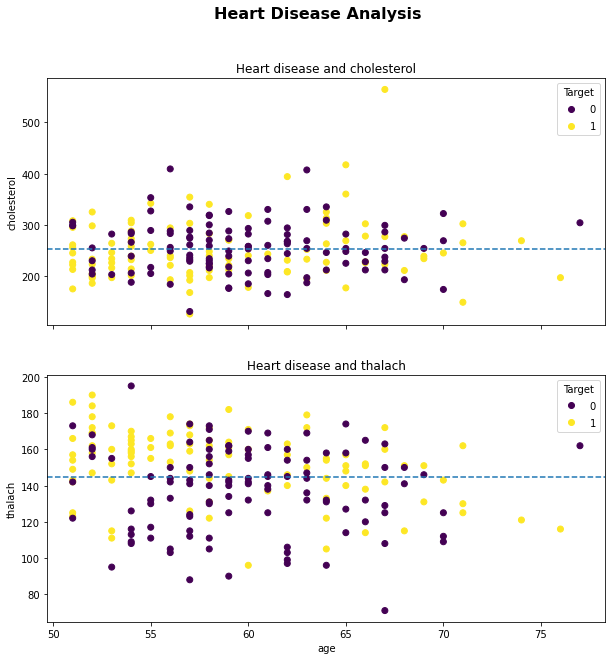

In [112]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (10, 10), sharex = True)

scatter = ax0.scatter(x = patients50['age'], y = patients50['chol'], c = patients50['target'])
ax0.set(title = 'Heart disease and cholesterol', ylabel = 'cholesterol')
ax0.legend(*scatter.legend_elements(), title = 'Target')
ax0.axhline(y = patients50['chol'].mean(), ls = '--')

scatt = ax1.scatter(x = patients50['age'], y = patients50['thalach'], c = patients50['target'])
ax1.set(title = 'Heart disease and thalach', xlabel = 'age', ylabel = 'thalach')
ax1.legend(*scatt.legend_elements(), title = 'Target')
ax1.axhline(y = patients50['thalach'].mean(), ls = '--')

fig.suptitle('Heart Disease Analysis', fontsize = 16, fontweight = 'bold');

In [114]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

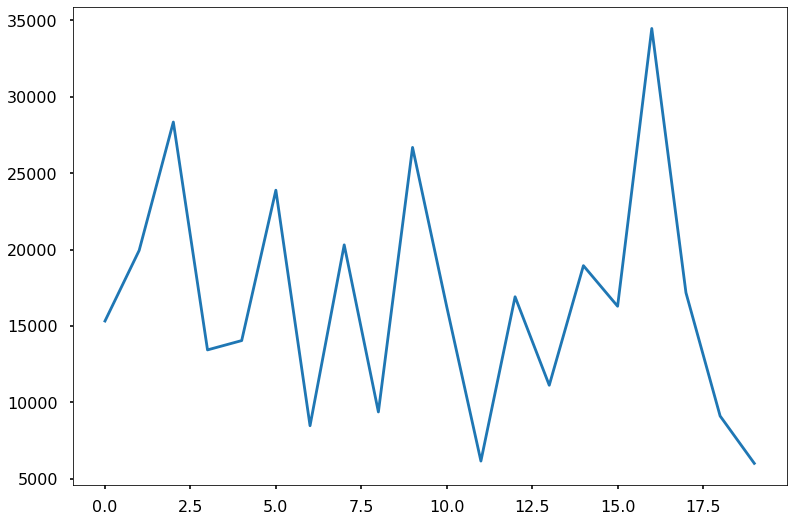

In [117]:
plt.style.use('seaborn-poster')
sales.head(20)['Price'].plot();

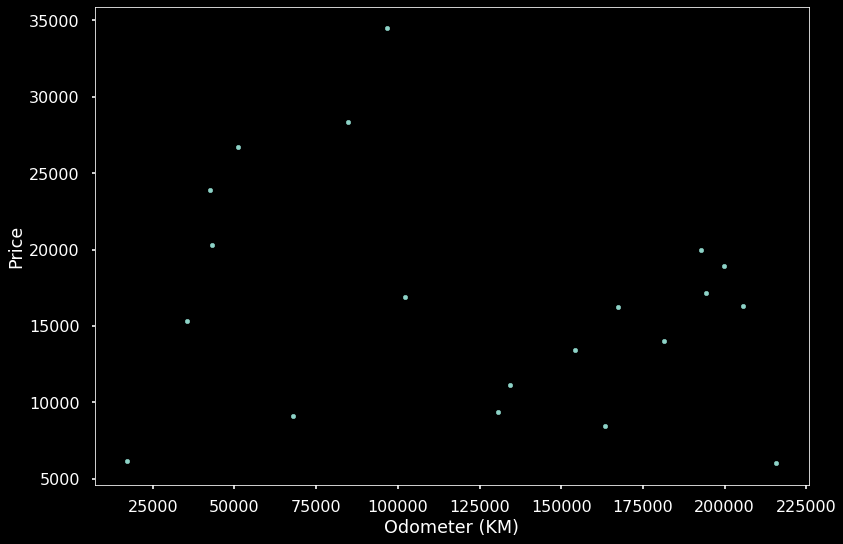

In [119]:
plt.style.use('dark_background')
sales.head(20).plot(x = 'Odometer (KM)', y = 'Price', kind = 'scatter');

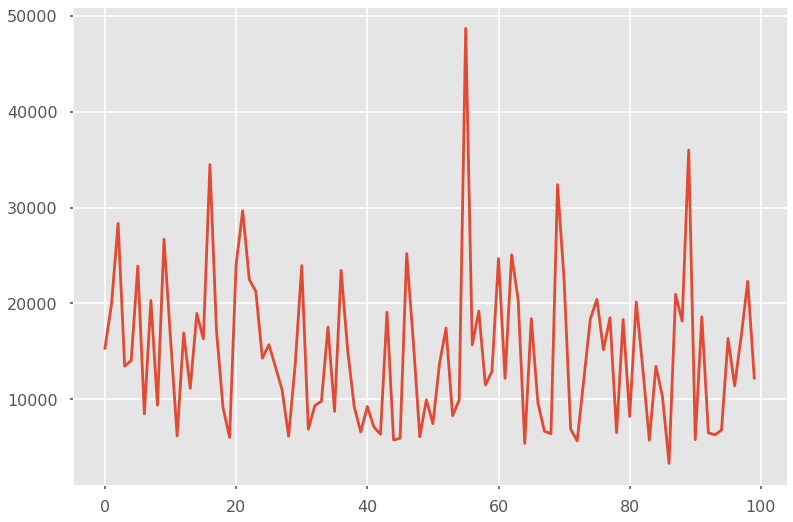

In [123]:
plt.style.use('ggplot')
sales.head(100)['Price'].plot();

In [130]:
rdf = pd.DataFrame(np.random.randn(10, 4), columns = 'a b c d'.split())


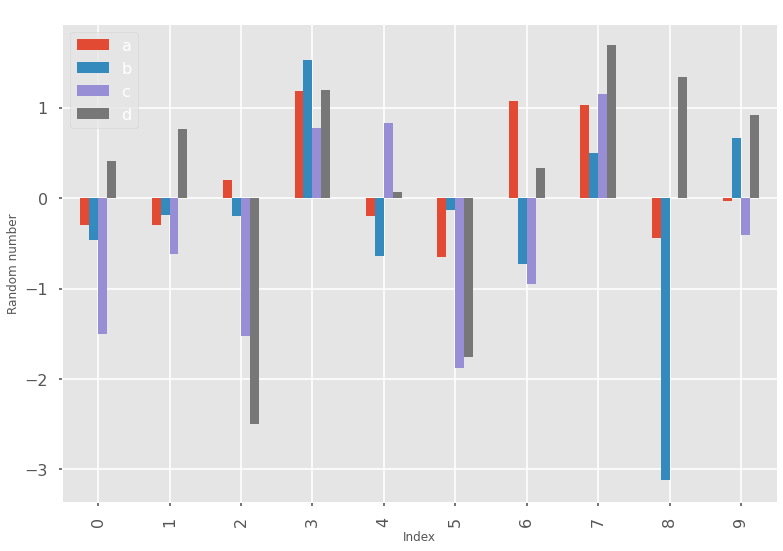

In [132]:
ax = rdf.plot(kind = 'bar');
ax.set(title = 'Random bar graph', xlabel = 'Index', ylabel = 'Random number')
ax.legend().set_visible = True


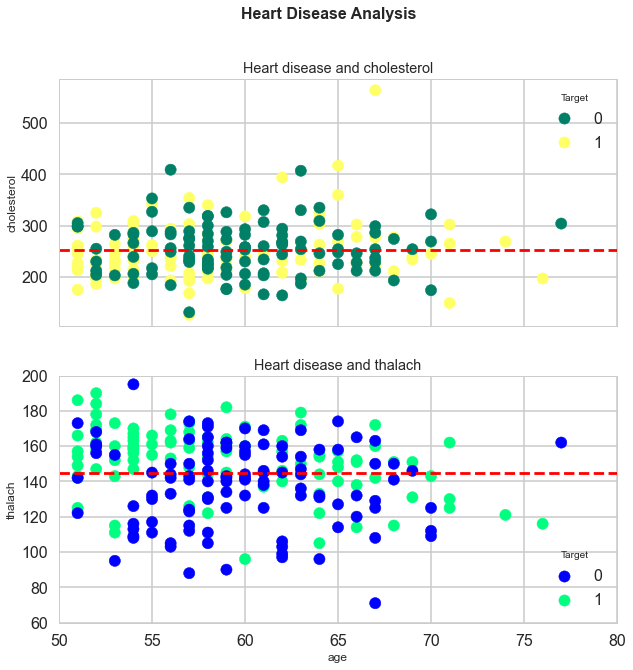

In [147]:
plt.style.use('seaborn-whitegrid')

fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (10, 10), sharex = True)

scatter = ax0.scatter(x = patients50['age'], y = patients50['chol'], c = patients50['target'], cmap = 'summer')
ax0.set(title = 'Heart disease and cholesterol', ylabel = 'cholesterol')
ax0.set_xlim([50, 80]) 
ax0.legend(*scatter.legend_elements(), title = 'Target')
ax0.axhline(y = patients50['chol'].mean(), ls = '--', color = 'r')

scatt = ax1.scatter(x = patients50['age'], y = patients50['thalach'], c = patients50['target'], cmap = 'winter')
ax1.set(title = 'Heart disease and thalach', xlabel = 'age', ylabel = 'thalach')
ax1.set_ylim([60, 200])
ax1.legend(*scatt.legend_elements(), title = 'Target')
ax1.axhline(y = patients50['thalach'].mean(), ls = '--', color = 'r')

fig.suptitle('Heart Disease Analysis', fontsize = 16, fontweight = 'bold');

In [ ]:
# fig.savefig('Heart-disease-analysis.png') 
# to save the plot as a png file